## Case Study on Correlation and Regression

#### A textile company regularly spent money on five advertising companies for their ads.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\jinoj\Downloads\Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [5]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

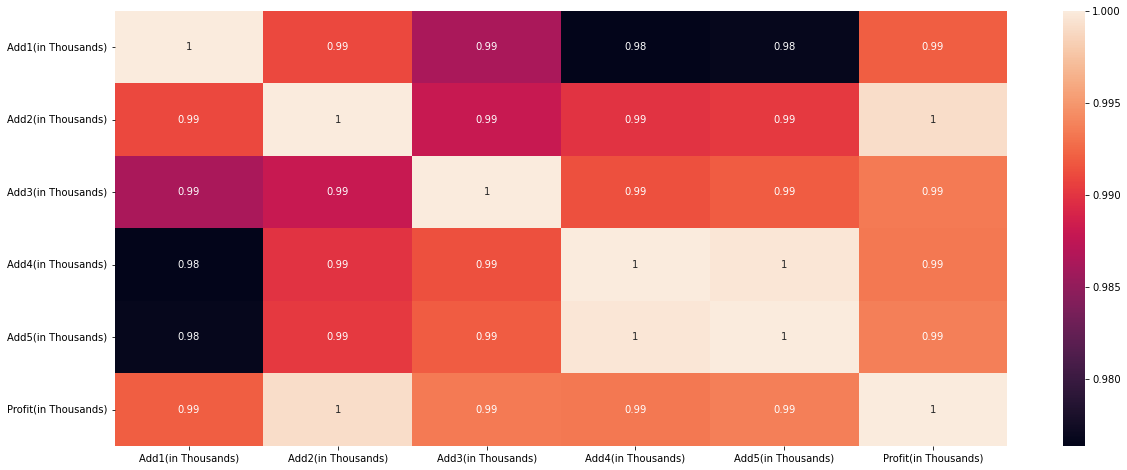

In [8]:
corrmatrix= df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True)
plt.show()

All add companies helps in generating profit and are positve corelated

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [9]:
x= df.iloc[:,[1,2,3,4,5]]
y= df['Profit(in Thousands)']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
from sklearn import linear_model
lr= linear_model.LinearRegression()
model= lr.fit(x_train,y_train)
predictions= model.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(y_test,predictions))

MSE= 3.2280219026459618e-25


### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
#### Add1(in Thousands) 290
#### Add2(in Thousands) 312
#### Add3(in Thousands) 309
#### Add4(in Thousands) 298
#### Add5(in Thousands) 320

In [13]:
Test=[[290,312,309,298,320]]
predictions=model.predict(Test)
print('Profit predicition =',predictions)

Profit predicition = [5820.06]


C:\Users\jinoj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
